In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("co2.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
x = df.drop('CO2 Emissions(g/km)', axis = 1)
y = df['CO2 Emissions(g/km)'] 

## Exploratory Data Analysis

In [5]:
x.shape

(7385, 11)

In [6]:
for col in x.columns: 
    print(col)
    print(x[col].isnull().sum())

Make
0
Model
0
Vehicle Class
0
Engine Size(L)
0
Cylinders
0
Transmission
0
Fuel Type
0
Fuel Consumption City (L/100 km)
0
Fuel Consumption Hwy (L/100 km)
0
Fuel Consumption Comb (L/100 km)
0
Fuel Consumption Comb (mpg)
0


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 634.8+ KB


### Data Understanding

In [8]:
numeric_col = []
object_col = []

for col in x.columns:
    if x[col].dtype in [np.int64, np.float64]:
        numeric_col.append(col)
    else:
        object_col.append(col)

In [9]:
numeric_col

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)']

In [10]:
object_col

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

##### Restart 1

In [11]:
x_numeric = x[numeric_col]
x_object = x[object_col]

In [12]:
x_numeric.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [13]:
x_object.head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


### Univariate Analysis

##### Numeric Columns

In [14]:
x_numeric.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000


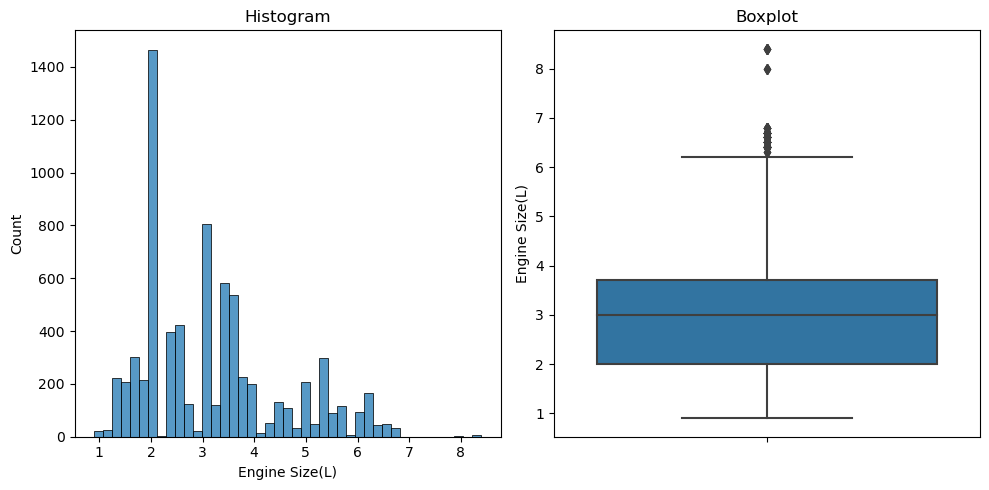

Columns : Engine Size(L)
Skewness: 0.8091809893113103
Kurtosis: -0.1319632848497747
p - value : 8.917891732394904e-139
Data is NOT normally distributed


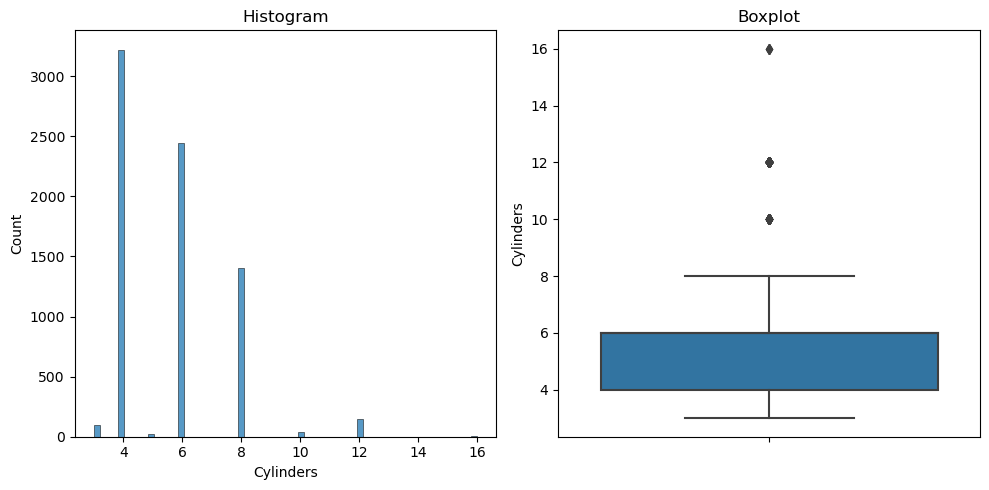

Columns : Cylinders
Skewness: 1.1104154181552897
Kurtosis: 1.5251749532359167
p - value : 5.473904930612653e-277
Data is NOT normally distributed


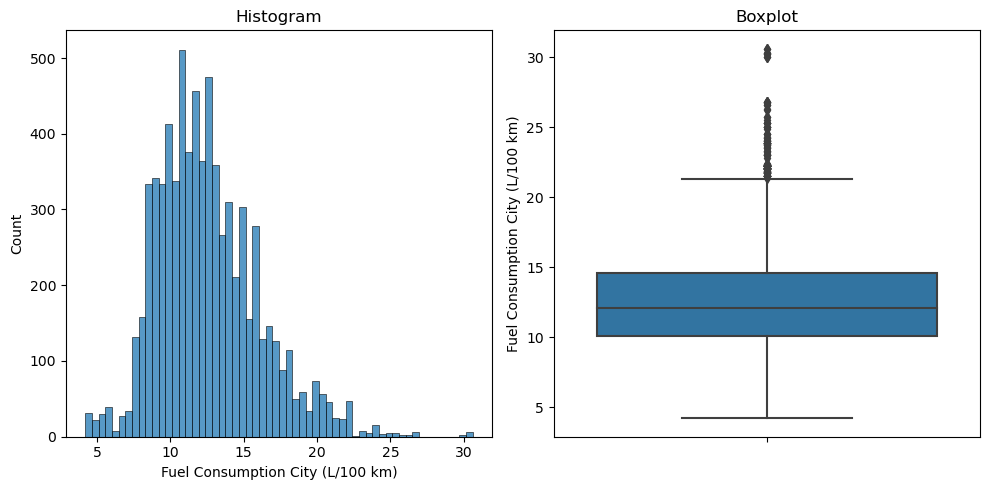

Columns : Fuel Consumption City (L/100 km)
Skewness: 0.809004712577022
Kurtosis: 1.1961449732393845
p - value : 2.704812414352894e-177
Data is NOT normally distributed


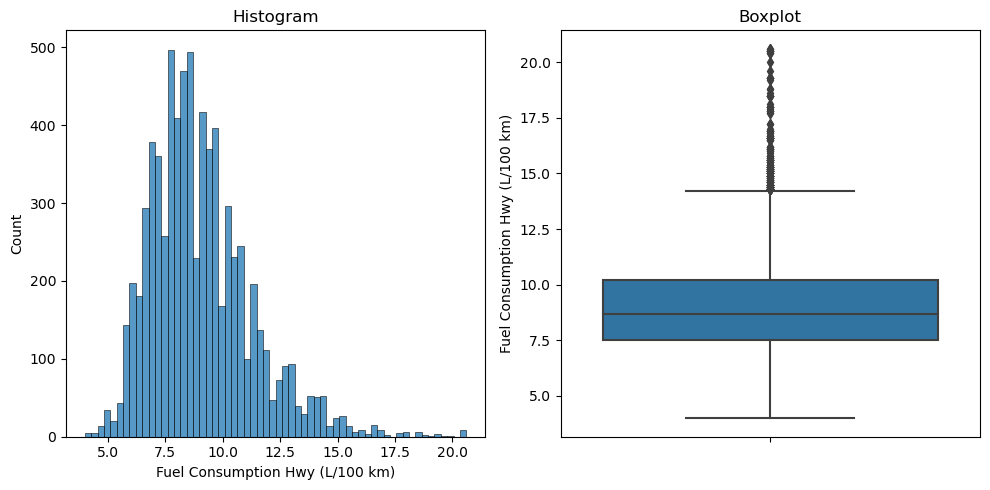

Columns : Fuel Consumption Hwy (L/100 km)
Skewness: 1.0792166921679716
Kurtosis: 2.0089688957038776
p - value : 1.0098037275001452e-288
Data is NOT normally distributed


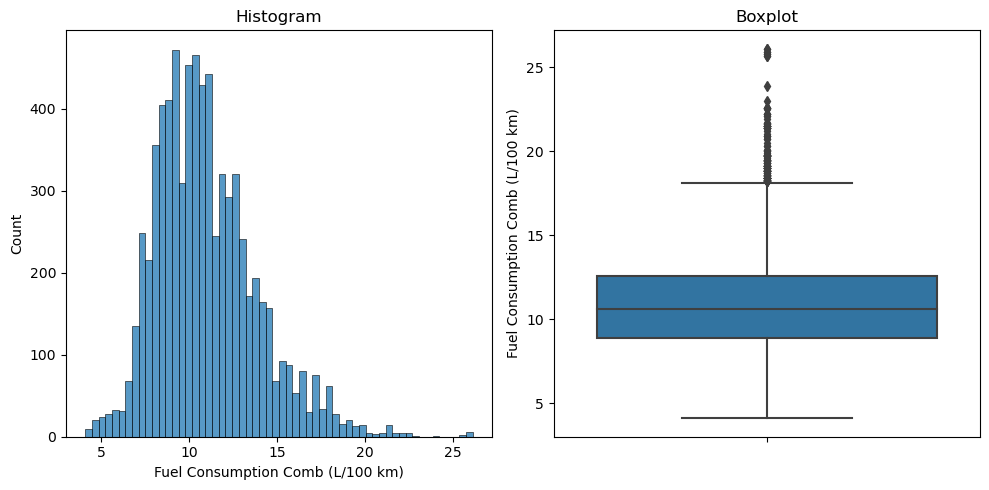

Columns : Fuel Consumption Comb (L/100 km)
Skewness: 0.893315721747063
Kurtosis: 1.393575350888704
p - value : 2.8272572165256524e-209
Data is NOT normally distributed


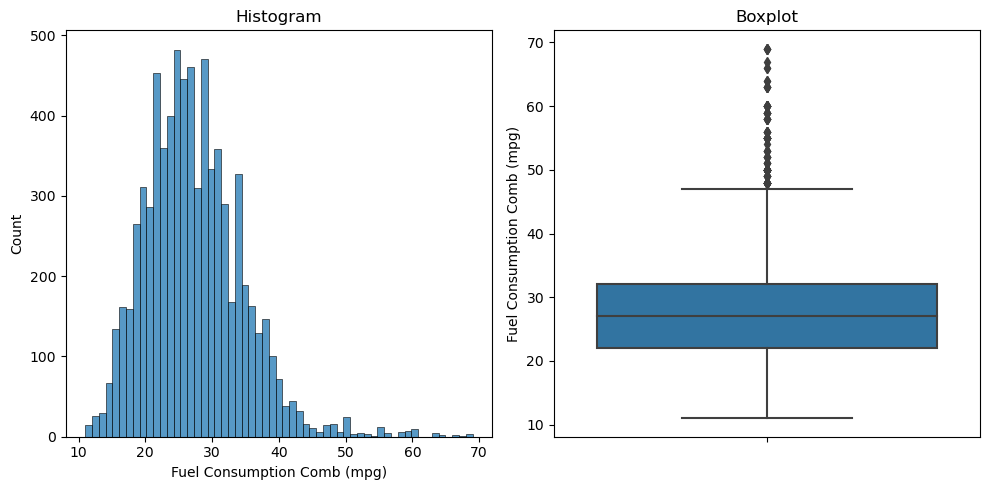

Columns : Fuel Consumption Comb (mpg)
Skewness: 0.9770340609789473
Kurtosis: 2.4993690355238343
p - value : 2.7633320043103937e-279
Data is NOT normally distributed


In [15]:
from scipy.stats import normaltest #Pakai normaltest buat large dataset sample > 5000

for col in x_numeric.columns:
    plt.figure(figsize = (10,5))
    
    #Histogram
    plt.subplot(1, 2, 1) #1 Row, 2 Columns, First Plot
    sns.histplot(x_numeric[col])
    plt.title('Histogram')
    
    
    #Boxplot
    plt.subplot(1, 2, 2) #1 Row, 2 Columns, Second plot
    sns.boxplot(y = x_numeric[col])
    plt.title('Boxplot')
    
    plt.tight_layout()
    plt.show()
    

    print(f'Columns : {col}')
    print(f'Skewness: {x_numeric[col].skew()}')
    print(f'Kurtosis: {x_numeric[col].kurtosis()}')
    
    stat, p = normaltest(x_numeric[col])
    print(f'p - value : {p}')
    if np.isnan(p): 
        continue
    elif p > 0.05: 
        print("Data is normally distributed")
    else:
        print("Data is NOT normally distributed")

In [16]:
results = []

for col in x_numeric.columns:

    skewness = x_numeric[col].skew()
    kurtosis = x_numeric[col].kurtosis()
    stat, p = normaltest(x_numeric[col])
    
    if np.isnan(p):
        normality = "Unknown"
    elif p > 0.05:
        normality = "Normal"
    else:
        normality = "Not Normal"
    
    results.append({
        'Feature': col,
        'Normality': normality,
        'P-Value': p,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

results_df

,Feature,Normality,P-Value,Skewness,Kurtosis
0,Engine Size(L),Not Normal,8.917892e-139,0.809181,-0.131963
1,Cylinders,Not Normal,5.473905e-277,1.110415,1.525175
2,Fuel Consumption City (L/100 km),Not Normal,2.704812e-177,0.809005,1.196145
3,Fuel Consumption Hwy (L/100 km),Not Normal,1.009804e-288,1.079217,2.008969
4,Fuel Consumption Comb (L/100 km),Not Normal,2.827257e-209,0.893316,1.393575
5,Fuel Consumption Comb (mpg),Not Normal,2.763332e-279,0.977034,2.499369


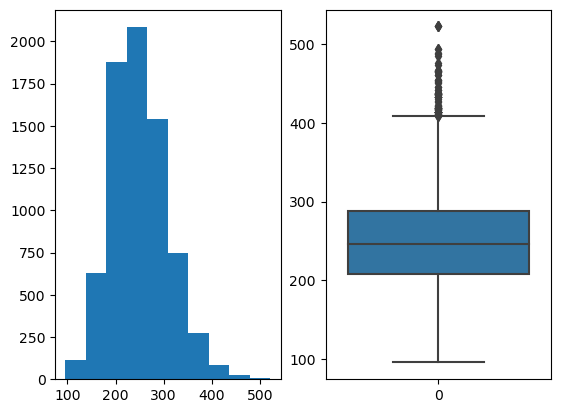

In [17]:
# Distribusi target variable
plt.subplot(1, 2, 1)
plt.hist(y)

plt.subplot(1, 2, 2)
sns.boxplot(y)
plt.show()

In [18]:
outlier = []

# Pakai IQR karena semua kolom tidak terdistribusi normal dan sangkat skewed dan keliatannya jumlah outliernya 
# sangat banyak sehingga IQR sangat bagus untuk deteksi outlier karena IQR menggunakan Q1 dan Q3 yang tidak terlalu
# bergantung pada mean dan standar deviasi 

for col in x_numeric.columns:
    
    q1 = x_numeric[col].quantile(0.25)
    q3 = x_numeric[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x_numeric[(x_numeric[col] < lower_outlier) | (x_numeric[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending = False).reset_index(drop = True)

outlier

,Column,Outliers,percentage_outlier
0,Fuel Consumption Hwy (L/100 km),208,2.82
1,Cylinders,196,2.65
2,Fuel Consumption Comb (L/100 km),142,1.92
3,Engine Size(L),137,1.86
4,Fuel Consumption City (L/100 km),132,1.79
5,Fuel Consumption Comb (mpg),114,1.54


In [19]:
from scipy.stats.mstats import winsorize

for col in x_numeric.columns: 
    x_numeric[col] = winsorize(x_numeric[col], limits = [0.05, 0.05])

In [20]:
outlier = []

# Pakai IQR karena semua kolom tidak terdistribusi normal dan sangkat skewed dan keliatannya jumlah outliernya 
# sangat banyak sehingga IQR sangat bagus untuk deteksi outlier karena IQR menggunakan Q1 dan Q3 yang tidak terlalu
# bergantung pada mean dan standar deviasi 

for col in x_numeric.columns:
    
    q1 = x_numeric[col].quantile(0.25)
    q3 = x_numeric[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x_numeric[(x_numeric[col] < lower_outlier) | (x_numeric[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending = False).reset_index(drop = True)

outlier

,Column,Outliers,percentage_outlier
0,Engine Size(L),0,0.0
1,Cylinders,0,0.0
2,Fuel Consumption City (L/100 km),0,0.0
3,Fuel Consumption Hwy (L/100 km),0,0.0
4,Fuel Consumption Comb (L/100 km),0,0.0
5,Fuel Consumption Comb (mpg),0,0.0


##### Object Columns

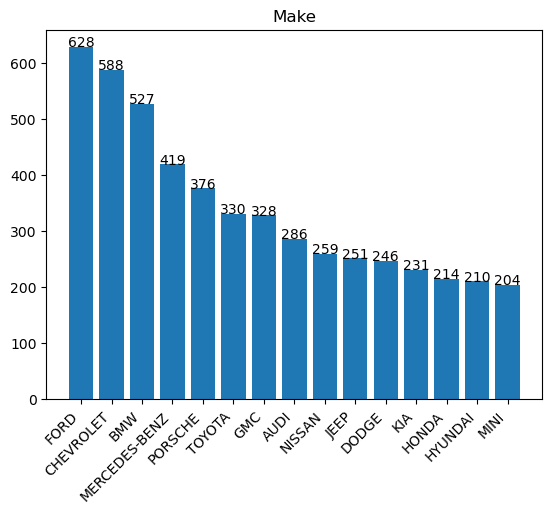

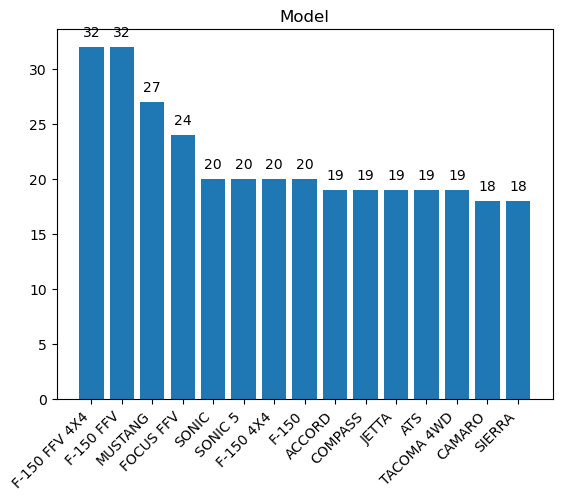

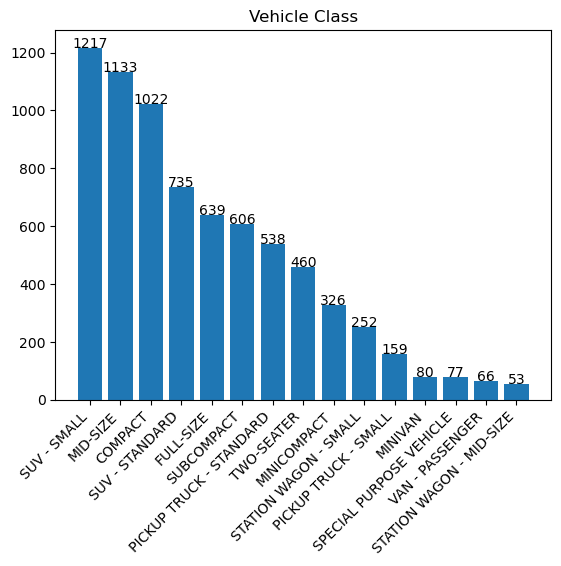

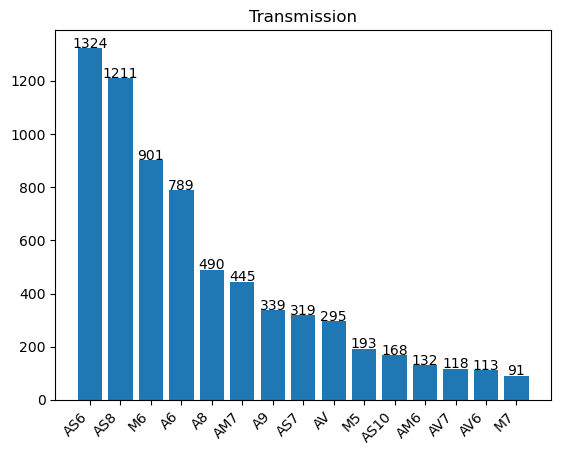

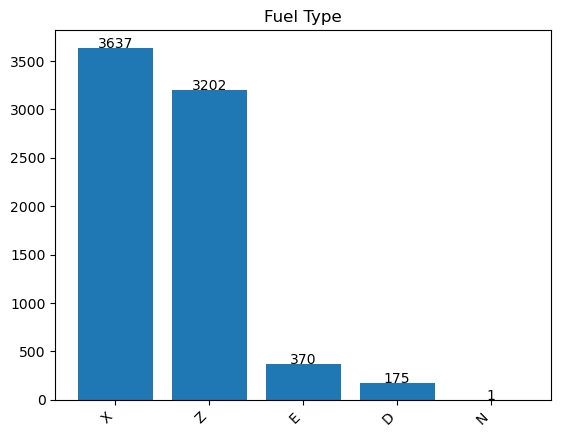

In [21]:

for col in x_object.columns:
    category_counts = x_object[col].value_counts()
    
    if len(category_counts) > 15:
        top_15 = category_counts.head(15)
        plt.bar(top_15.index, top_15.values)
        
        for i, value in enumerate(top_15.values):
            plt.text(i, value + 1, str(value), ha ='center', fontsize = 10)
    else:
        plt.bar(category_counts.index, category_counts.values)
        
        for i, value in enumerate(category_counts.values):
            plt.text(i, value + 1, str(value), ha ='center', fontsize = 10)
    
    plt.title(f'{col}')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

### Bivariate Analysis

In [22]:
from scipy.stats import spearmanr

corr = []

for col in x_numeric.columns:

    corr_coeff, p_value = spearmanr(x_numeric[col], y)
    
    if p_value < 0.05:
        print(f"There is a statistically significant correlation between {col} and predicted_cc")
        relation = 'Correlate'
    else:
        relation = 'Not'
    

    corr.append({
        'Feature': col,
        'Correlation Score': corr_coeff,
        'p-value': p_value,
        'Relation': relation
    })

df_corr = pd.DataFrame(corr)

df_corr

There is a statistically significant correlation between Engine Size(L) and predicted_cc
There is a statistically significant correlation between Cylinders and predicted_cc
There is a statistically significant correlation between Fuel Consumption City (L/100 km) and predicted_cc
There is a statistically significant correlation between Fuel Consumption Hwy (L/100 km) and predicted_cc
There is a statistically significant correlation between Fuel Consumption Comb (L/100 km) and predicted_cc
There is a statistically significant correlation between Fuel Consumption Comb (mpg) and predicted_cc


,Feature,Correlation Score,p-value,Relation
0,Engine Size(L),0.869269,0.0,Correlate
1,Cylinders,0.847764,0.0,Correlate
2,Fuel Consumption City (L/100 km),0.955825,0.0,Correlate
3,Fuel Consumption Hwy (L/100 km),0.940721,0.0,Correlate
4,Fuel Consumption Comb (L/100 km),0.962481,0.0,Correlate
5,Fuel Consumption Comb (mpg),-0.961673,0.0,Correlate


### Multivariate Analysis

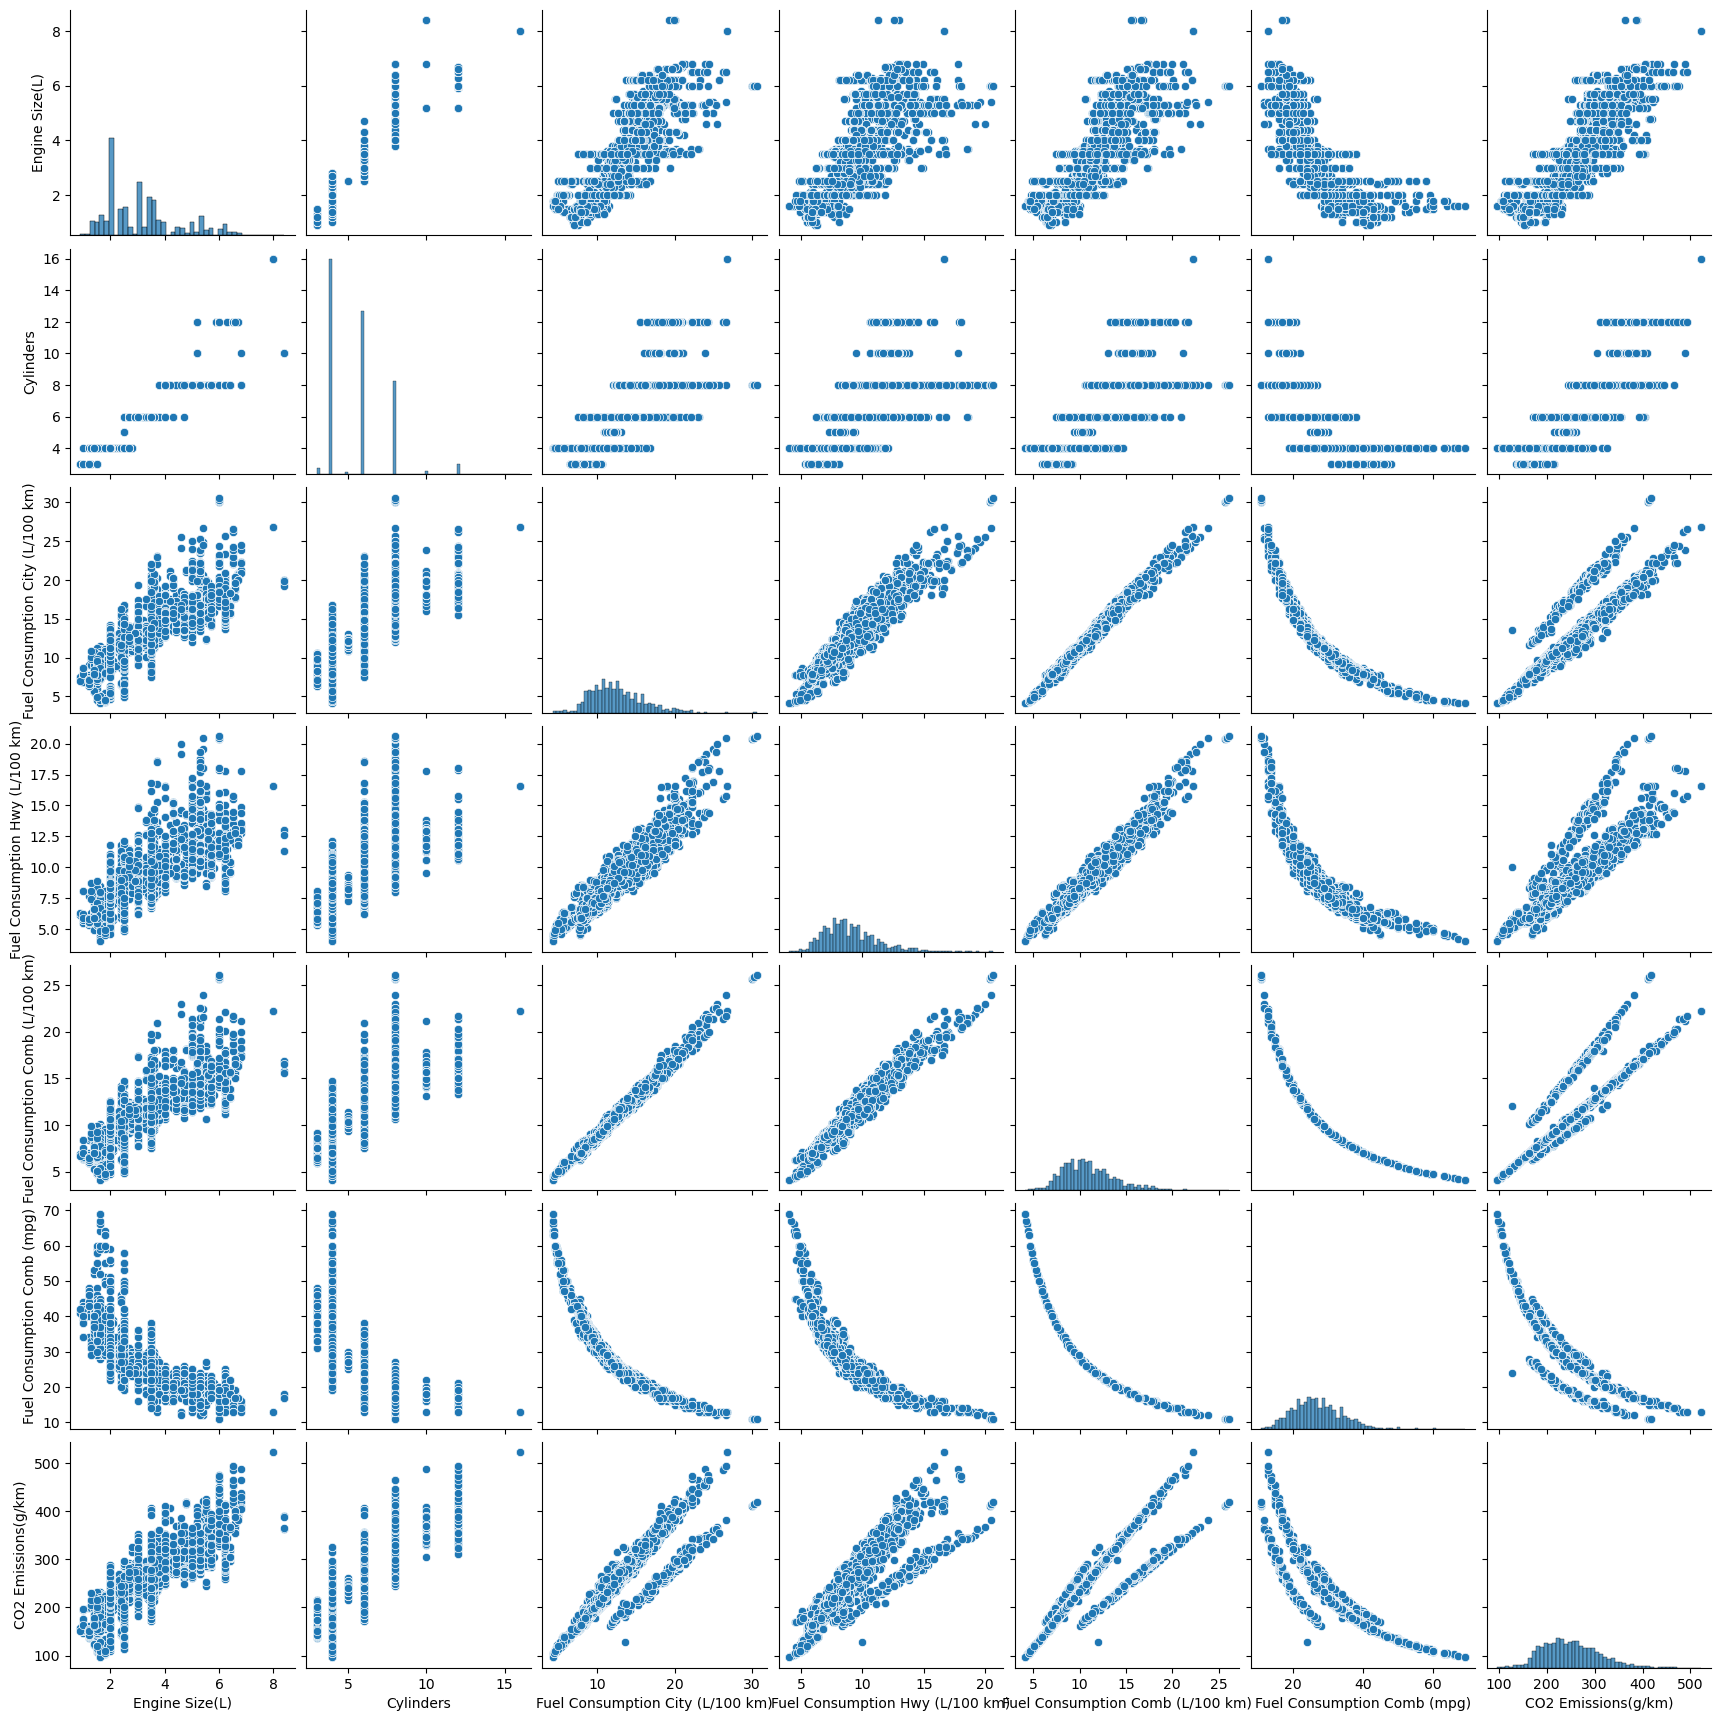

In [23]:
sns.pairplot(df, palette = 'husl')

<Axes: >

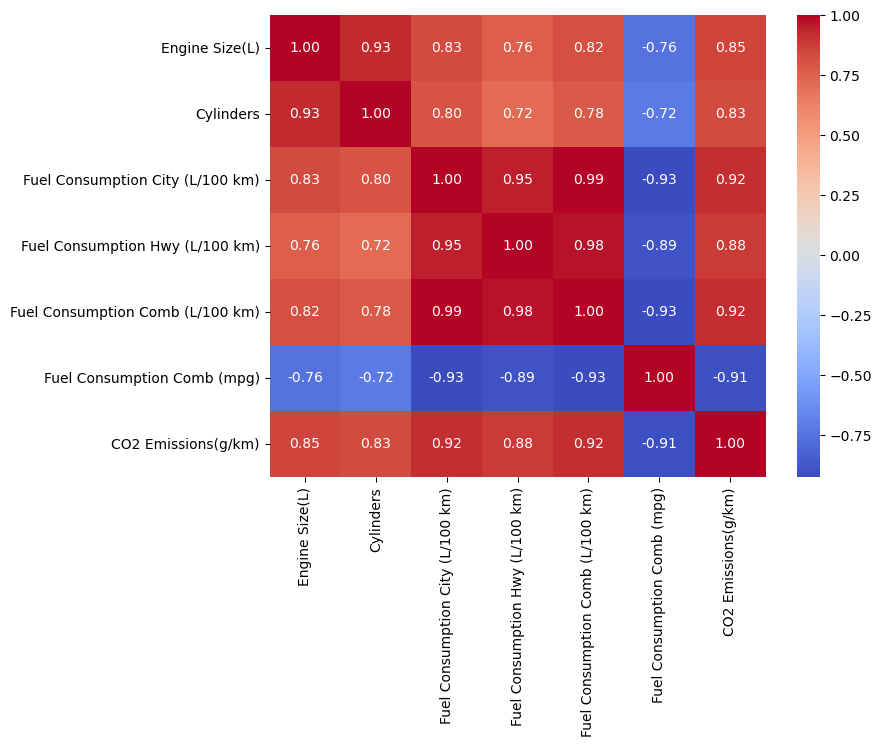

In [24]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

## Feature Engineering

### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in x_object.columns:
    x_object[col] = enc.fit_transform(x_object[col])

x_object.head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,0,1057,0,14,4
1,0,1057,0,25,4
2,0,1058,0,22,4
3,0,1233,11,15,4
4,0,1499,11,15,4


### Merging

In [26]:
data = pd.merge(x_numeric, x_object, how = 'outer', left_index = True, right_index = True)
data.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
Make                                0
Model                               0
Vehicle Class                       0
Transmission                        0
Fuel Type                           0
dtype: int64

In [27]:
data.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make,Model,Vehicle Class,Transmission,Fuel Type
0,2.0,4,9.9,6.7,8.5,33,0,1057,0,14,4
1,2.4,4,11.2,7.7,9.6,29,0,1057,0,25,4
2,1.5,4,8.0,6.1,7.2,39,0,1058,0,22,4
3,3.5,6,12.7,9.1,11.1,25,0,1233,11,15,4
4,3.5,6,12.1,8.7,10.6,27,0,1499,11,15,4


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)  7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 6   Make                              7385 non-null   int64  
 7   Model                             7385 non-null   int64  
 8   Vehicle Class                     7385 non-null   int64  
 9   Transmission                      7385 non-null   int64  
 10  Fuel Type                         7385 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 634.8 KB


### Normalization

In [29]:
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()

data_norm = pd.DataFrame(scale.fit_transform(data), columns = data.columns)

data_norm.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make,Model,Vehicle Class,Transmission,Fuel Type
0,-0.588235,-1.0,-0.488889,-0.740741,-0.567568,0.6,-0.9,0.058409,-0.666667,-0.090909,1.0
1,-0.352941,-1.0,-0.200000,-0.370370,-0.270270,0.2,-0.9,0.058409,-0.666667,0.909091,1.0
2,-0.882353,-1.0,-0.911111,-0.962963,-0.918919,1.2,-0.9,0.059416,-0.666667,0.636364,1.0
3,0.294118,0.0,0.133333,0.148148,0.135135,-0.2,-0.9,0.235650,0.555556,0.000000,1.0
4,0.294118,0.0,0.000000,0.000000,0.000000,0.0,-0.9,0.503525,0.555556,0.000000,1.0


### Splitting Data

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_norm, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 11)
(1477, 11)
(5908,)
(1477,)


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Ensemble Learning
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

### Modelling 1

In [32]:
dt = DecisionTreeRegressor()
ln = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor(objective = 'reg:squarederror', random_state = 0)

dt.fit(x_train, y_train)
ln.fit(x_train, y_train)
rf.fit(x_train, y_train)
xg.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_ln = ln.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_xg = xg.predict(x_test)

metrics = {
    "Model": ["Decision Tree", "Linear Regression", "Random Forest", "XGBRegressor"],
    "R2_Score": [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_ln),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xg),
    ],
    "MAE": [
        MAE(y_test, y_pred_dt),
        MAE(y_test, y_pred_ln),
        MAE(y_test, y_pred_rf),
        MAE(y_test, y_pred_xg),
    ],
    "MSE": [
        MSE(y_test, y_pred_dt),
        MSE(y_test, y_pred_ln),
        MSE(y_test, y_pred_rf),
        MSE(y_test, y_pred_xg),
    ],
}

results_df = pd.DataFrame(metrics)

results_df

,Model,R2_Score,MAE,MSE
0,Decision Tree,0.994223,2.087644,19.788222
1,Linear Regression,0.899455,10.893531,344.430175
2,Random Forest,0.992970,2.195117,24.083272
3,XGBRegressor,0.992884,2.212056,24.375210


### Ensemble Learning

#### Voting Regressor

In [33]:
voting_regressor = VotingRegressor(estimators = [
    ('decision_tree', dt),
    ('linear_regression', ln),
    ('random_forest', rf),
    ('xgboost', xg)
])

voting_regressor.fit(x_train, y_train)

y_pred_voting = voting_regressor.predict(x_test)

print(f"R2 Score : {r2_score(y_test, y_pred_voting) :.5f}")
print(f"Mean Absolute Error Score : {MAE(y_test, y_pred_voting) :.5f}")
print(f"Mean Squared Error Score : {MSE(y_test, y_pred_voting) :.5f}")

R2 Score : 0.98816
Mean Absolute Error Score : 3.56868
Mean Squared Error Score : 40.57619


#### Stacking Regressor

In [34]:
base_models = [
    ('decision_tree', dt),
    ('linear_regression', ln),
    ('random_forest', rf),
    ('xgboost', xg)
]

meta_model = Ridge(alpha = 1.0)

stacking_regressor = StackingRegressor(estimators = base_models, 
                                       final_estimator = meta_model, 
                                       cv = 5)

stacking_regressor.fit(x_train, y_train)

y_pred_stack = stacking_regressor.predict(x_test)

print(f"R2 Score : {r2_score(y_test, y_pred_stack) :.5f}")
print(f"Mean Absolute Error Score : {MAE(y_test, y_pred_stack) :.5f}")
print(f"Mean Squared Error Score : {MSE(y_test, y_pred_stack) :.5f}")

R2 Score : 0.99303
Mean Absolute Error Score : 2.12769
Mean Squared Error Score : 23.86140


### Tuning Hyperparameter 1

In [35]:
from sklearn.model_selection import RandomizedSearchCV

dt_params = {
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

xg_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

# Models
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xg = XGBRegressor(objective="reg:squarederror", random_state=0)

# RandomizedSearchCV for hyperparameter tuning
dt_search = RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=10, cv=3, random_state=0, n_jobs=-1)
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10, cv=3, random_state=0, n_jobs=-1)
xg_search = RandomizedSearchCV(estimator=xg, param_distributions=xg_params, n_iter=10, cv=3, random_state=0, n_jobs=-1)

# Fit models
dt_search.fit(x_train, y_train)
rf_search.fit(x_train, y_train)
xg_search.fit(x_train, y_train)

# Best estimators
best_dt = dt_search.best_estimator_
best_rf = rf_search.best_estimator_
best_xg = xg_search.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(x_test)
y_pred_rf = best_rf.predict(x_test)
y_pred_xg = best_xg.predict(x_test)

# Evaluate the models
metrics = {
    "Model": ["Decision Tree", "Random Forest", "XGBRegressor"],
    "R2_Score": [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xg),
    ],
    "MAE": [
        MAE(y_test, y_pred_dt),
        MAE(y_test, y_pred_rf),
        MAE(y_test, y_pred_xg),
    ],
    "MSE": [
        MSE(y_test, y_pred_dt),
        MSE(y_test, y_pred_rf),
        MSE(y_test, y_pred_xg),
    ],
}

results_df = pd.DataFrame(metrics)

# Display Results
print("Best Hyperparameters:")
print(f"Decision Tree: {dt_search.best_params_}")
print(f"Random Forest: {rf_search.best_params_}")
print(f"XGBoost: {xg_search.best_params_}\n")

print("Performance Metrics:")
results_df

Best Hyperparameters:
Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
XGBoost: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Performance Metrics:


,Model,R2_Score,MAE,MSE
0,Decision Tree,0.992417,2.769672,25.975826
1,Random Forest,0.992422,2.230459,25.960250
2,XGBRegressor,0.993562,2.163917,22.052525


### Feature Selection PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)


print(pca.explained_variance_ratio_)

[0.55460905 0.15623312 0.07112034]


### Modelling 2

In [37]:
dt2 = DecisionTreeRegressor()
ln2 = LinearRegression()
rf2 = RandomForestRegressor()
xg2 = XGBRegressor(objective = 'reg:squarederror', random_state = 0)

dt2.fit(x_train_pca, y_train)
ln2.fit(x_train_pca, y_train)
rf2.fit(x_train_pca, y_train)
xg2.fit(x_train_pca, y_train)

y_pred_dt2 = dt2.predict(x_test_pca)
y_pred_ln2 = ln2.predict(x_test_pca)
y_pred_rf2 = rf2.predict(x_test_pca)
y_pred_xg2 = xg2.predict(x_test_pca)

metrics = {
    "Model": ["Decision Tree", "Linear Regression", "Random Forest", "XGBRegressor"],
    "R2_Score": [
        r2_score(y_test, y_pred_dt2),
        r2_score(y_test, y_pred_ln2),
        r2_score(y_test, y_pred_rf2),
        r2_score(y_test, y_pred_xg2),
    ],
    "MAE": [
        MAE(y_test, y_pred_dt2),
        MAE(y_test, y_pred_ln2),
        MAE(y_test, y_pred_rf2),
        MAE(y_test, y_pred_xg2),
    ],
    "MSE": [
        MSE(y_test, y_pred_dt2),
        MSE(y_test, y_pred_ln2),
        MSE(y_test, y_pred_rf2),
        MSE(y_test, y_pred_xg2),
    ],
}

results_df = pd.DataFrame(metrics)

results_df


,Model,R2_Score,MAE,MSE
0,Decision Tree,0.939449,9.262006,207.425431
1,Linear Regression,0.883021,13.289450,400.726578
2,Random Forest,0.960004,7.950355,137.009563
3,XGBRegressor,0.951726,8.725379,165.369580


### Tuning Hyperparameter 2

In [39]:
dt_params = {
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

xg_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

# Models
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xg = XGBRegressor(objective="reg:squarederror", random_state=0)

# RandomizedSearchCV for hyperparameter tuning
dt_search = RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=10, cv=3, random_state=0, n_jobs=-1)
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10, cv=3, random_state=0, n_jobs=-1)
xg_search = RandomizedSearchCV(estimator=xg, param_distributions=xg_params, n_iter=10, cv=3, random_state=0, n_jobs=-1)

dt_search.fit(x_train_pca, y_train)
rf_search.fit(x_train_pca, y_train)
xg_search.fit(x_train_pca, y_train)

# Best estimators
best_dt = dt_search.best_estimator_
best_rf = rf_search.best_estimator_
best_xg = xg_search.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(x_test_pca)
y_pred_rf = best_rf.predict(x_test_pca)
y_pred_xg = best_xg.predict(x_test_pca)

# Evaluate the models
metrics = {
    "Model": ["Decision Tree", "Random Forest", "XGBRegressor"],
    "R2_Score": [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xg),
    ],
    "MAE": [
        MAE(y_test, y_pred_dt),
        MAE(y_test, y_pred_rf),
        MAE(y_test, y_pred_xg),
    ],
    "MSE": [
        MSE(y_test, y_pred_dt),
        MSE(y_test, y_pred_rf),
        MSE(y_test, y_pred_xg),
    ],
}

results_df = pd.DataFrame(metrics)

# Display Results
print("Best Hyperparameters:")
print(f"Decision Tree: {dt_search.best_params_}")
print(f"Random Forest: {rf_search.best_params_}")
print(f"XGBoost: {xg_search.best_params_}\n")

print("Performance Metrics:")
results_df

Best Hyperparameters:
Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
XGBoost: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Performance Metrics:


,Model,R2_Score,MAE,MSE
0,Decision Tree,0.937427,9.223448,214.351658
1,Random Forest,0.958699,7.990174,141.480042
2,XGBRegressor,0.953959,8.418516,157.717573


## Comparison

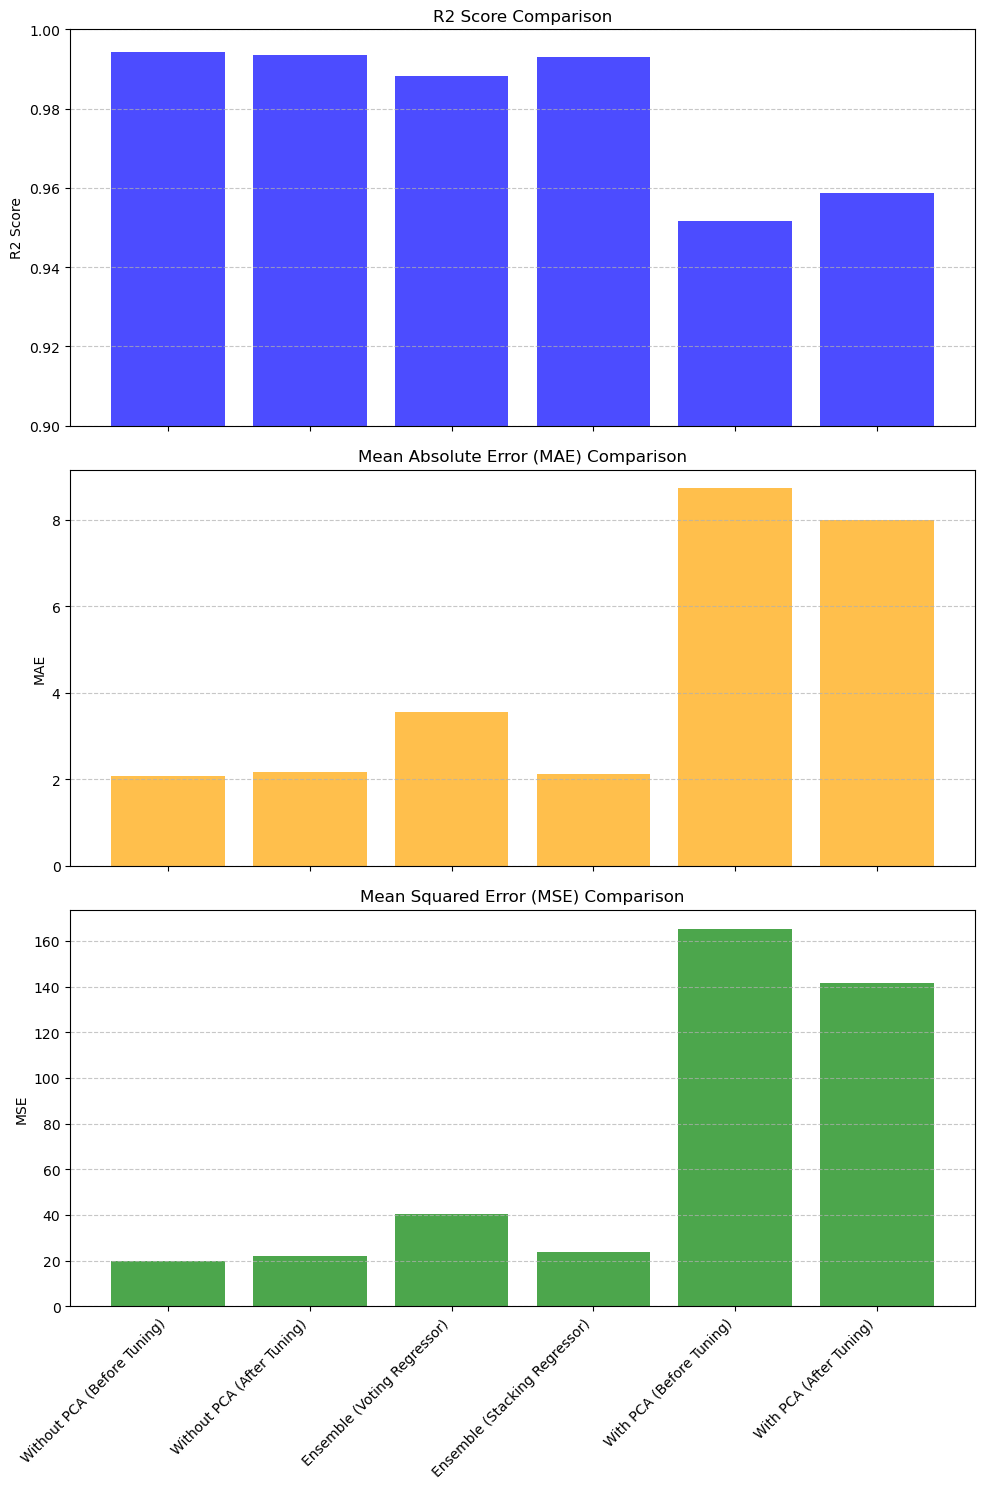

In [40]:
# Data for analysis
data = {
    "Condition": [
        "Without PCA (Before Tuning)", 
        "Without PCA (After Tuning)", 
        "Ensemble (Voting Regressor)", 
        "Ensemble (Stacking Regressor)",
        "With PCA (Before Tuning)", 
        "With PCA (After Tuning)"
    ],
    "R2_Score": [
        0.994223, 0.993562, 0.98816, 0.99303, 
        0.951726, 0.958699
    ],
    "MAE": [
        2.087644, 2.163917, 3.56868, 2.12769, 
        8.725379, 7.990174
    ],
    "MSE": [
        19.788222, 22.052525, 40.57619, 23.86140, 
        165.369580, 141.480042
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# R2 Score plot
axes[0].bar(df["Condition"], df["R2_Score"], color='blue', alpha=0.7)
axes[0].set_title("R2 Score Comparison")
axes[0].set_ylabel("R2 Score")
axes[0].set_ylim(0.9, 1)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# MAE plot
axes[1].bar(df["Condition"], df["MAE"], color='orange', alpha=0.7)
axes[1].set_title("Mean Absolute Error (MAE) Comparison")
axes[1].set_ylabel("MAE")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# MSE plot
axes[2].bar(df["Condition"], df["MSE"], color='green', alpha=0.7)
axes[2].set_title("Mean Squared Error (MSE) Comparison")
axes[2].set_ylabel("MSE")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.set_xticklabels(df["Condition"], rotation=45, ha='right')

plt.tight_layout()
plt.show()


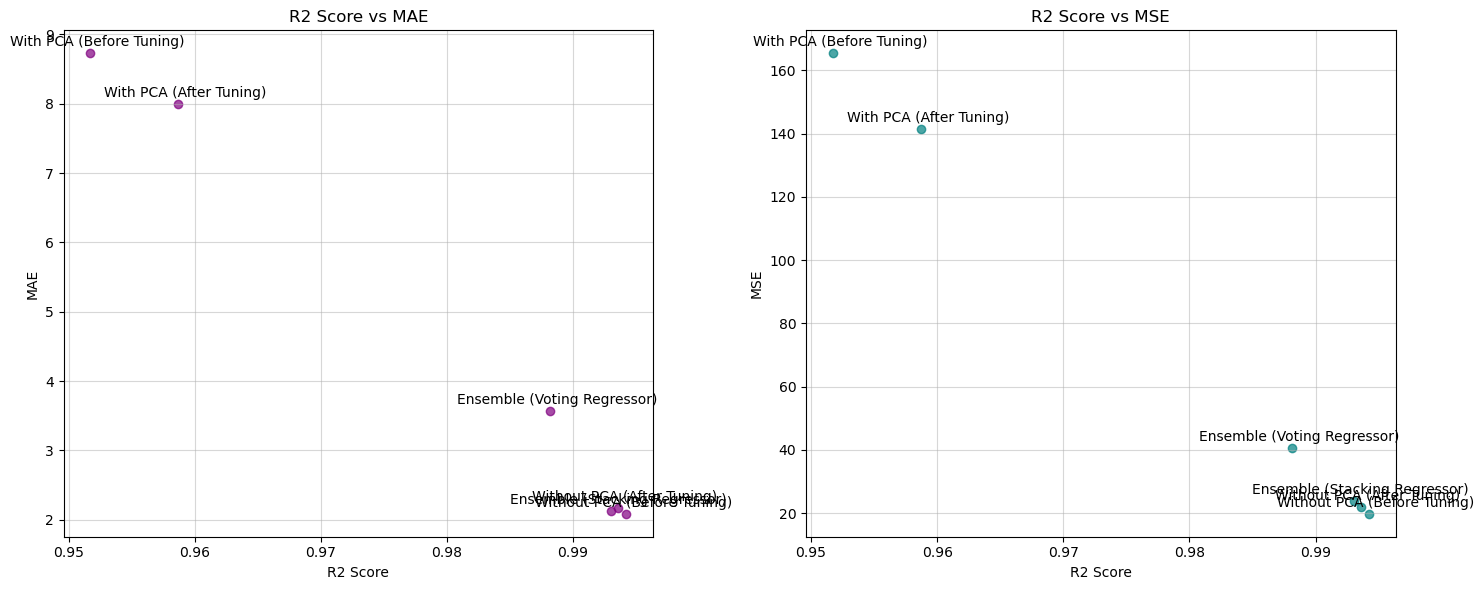

In [41]:
# Scatter plots for R2 vs MAE and R2 vs MSE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R2 vs MAE
axes[0].scatter(df["R2_Score"], df["MAE"], color='purple', alpha=0.7)
for i, label in enumerate(df["Condition"]):
    axes[0].annotate(label, (df["R2_Score"][i], df["MAE"][i]), textcoords="offset points", xytext=(5,5), ha='center')
axes[0].set_title("R2 Score vs MAE")
axes[0].set_xlabel("R2 Score")
axes[0].set_ylabel("MAE")
axes[0].grid(alpha=0.5)

# R2 vs MSE
axes[1].scatter(df["R2_Score"], df["MSE"], color='teal', alpha=0.7)
for i, label in enumerate(df["Condition"]):
    axes[1].annotate(label, (df["R2_Score"][i], df["MSE"][i]), textcoords="offset points", xytext=(5,5), ha='center')
axes[1].set_title("R2 Score vs MSE")
axes[1].set_xlabel("R2 Score")
axes[1].set_ylabel("MSE")
axes[1].grid(alpha=0.5)

plt.tight_layout()
plt.show()


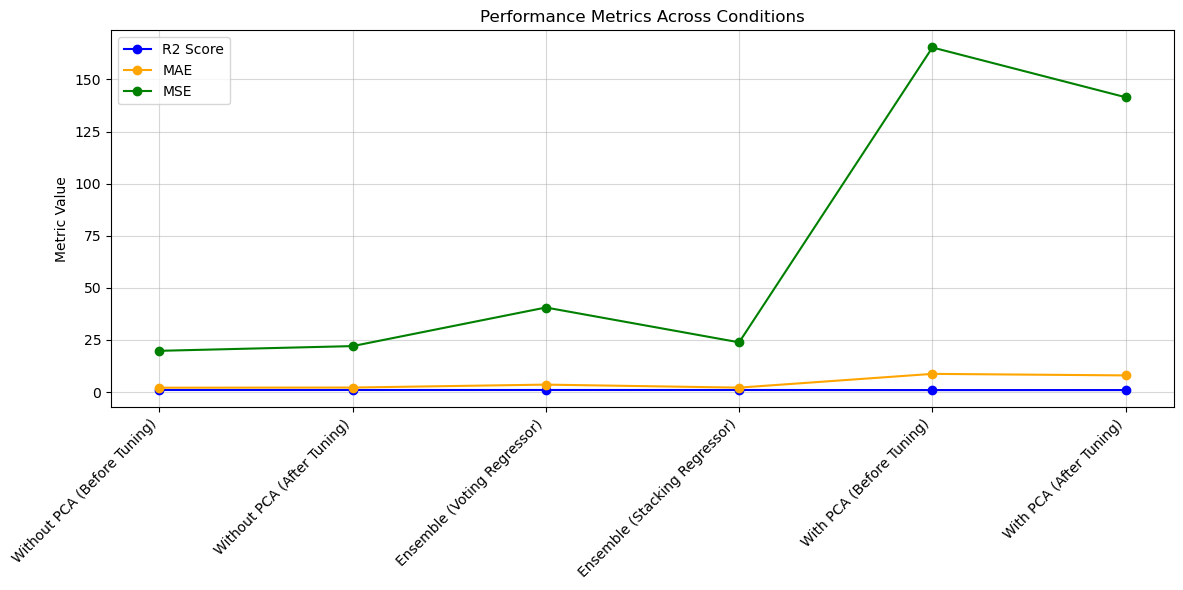

In [42]:
# Line plots to compare changes across conditions
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot for R2, MAE, and MSE
ax.plot(df["Condition"], df["R2_Score"], marker='o', label='R2 Score', color='blue')
ax.plot(df["Condition"], df["MAE"], marker='o', label='MAE', color='orange')
ax.plot(df["Condition"], df["MSE"], marker='o', label='MSE', color='green')

# Adding titles and labels
ax.set_title("Performance Metrics Across Conditions")
ax.set_ylabel("Metric Value")
ax.legend()
ax.grid(alpha=0.5)
ax.set_xticklabels(df["Condition"], rotation=45, ha='right')

plt.tight_layout()
plt.show()